# **Progress + Proposal**

###**Part1: The Progress**


###Project Title:
+ **SmartCam Assistant:** Real-Time Traffic Light Recognition for Color-Blind and
Visually Impaired Drivers.

###Core Features:

1. **Object Detection:** Use a pre-trained model (YOLOv5)
to detect traffic lights in real time.
2. **Color Classification:** Segment and classify the color of the light (Red,
Yellow, Green) using MakeSense.com.
3. **Audio Feedback:** Use text-to-speech (using pyttsx3S) to announce the
detected light.
4. **Webcam Integration:** Capture video stream using OpenCV.


-----------------------------------
Over the past two weeks I’ve been working on my SmartCam Assistant project by building and training a YOLO-based traffic-light detector and wiring it into a real-time inference loop with OpenCV and pyttsx3. I collected and labeled roughly 100 images of my traffic light model under varying angles and lighting. Then I used MakeSense.ai to produce YOLO annotations for three classes: red, yellow, and green. Training on YOLOv5s in Colab yielded a best mAP@0.5–0.95 of 0.827, with per-class APs of 0.774 (red), 0.870 (yellow), and 0.837 (green). Software-wise the biggest initial hurdle was getting LabelImg working under Python 3.13 (fixed by switching to a conda env on 3.10), and then later routing OpenCV to the USB camera instead of the built-in webcam (solved by disabling the internal camera).



On the integration side, I’ve successfully written smartcam.py to load the best.pt weights, grab frames from the USB cam at 720p, run YOLO inference, draw bounding boxes, and speak the appropriate warning: red (“it is a red light you need to stop”), yellow (“slow down it is a yellow light”), or green (“it is a green light keep driving”).
I even added a configurable two-second delay so the speech stays in sync with the video. The system now robustly handles both single-light and all-three-lights-on scenarios. It also detects traffic lights on my phone screen.

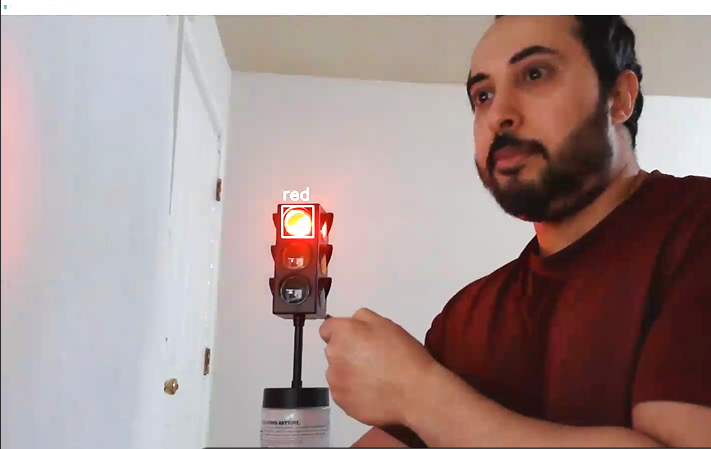

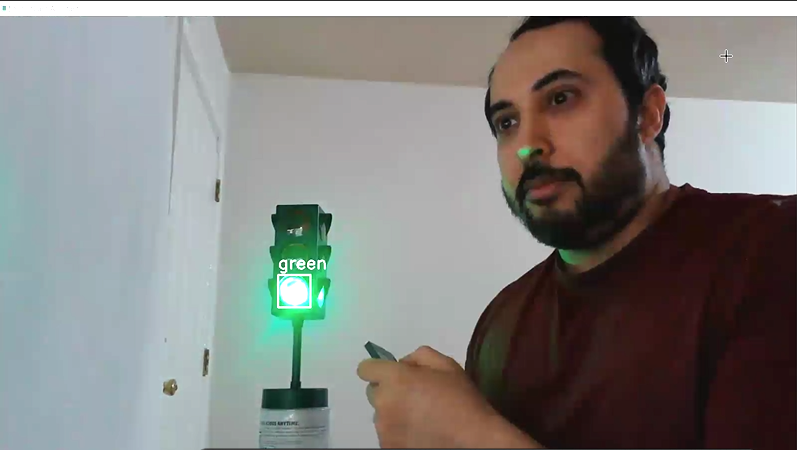

**Missing still are:**

(1) a simple GUI to control delay and camera selection.
(2) real-world testing on street-scene images to validate generalization beyond the tabletop model. Therefore, whenever I drove my car, I began taking photos of actual traffic lights.

## **Next Steps:**

**Data expansion & retraining:**
+ I started to capture and label real street traffic light images.
+ Adding and training using the YOLO dataset.
+ Retrain (or fine-tune) the model in Colab, then download the updated best.pt.

**Deployment and Testing:**

+ Run the assistant on a laptop in my car while driving and pointing the usb cam at real traffic lights.
+ Testing the process of detecting the real traffic light and measuring model performance.
+ Record a short video + timestamps and measure detection latency.

**Overall Goals:**
+ Originally, I aimed to build a system “SmartCam” to aid color-blind or visually impaired drivers. After this week’s success on the tabletop model, I’ve refined the goal to deliver a deployable desktop app that works on real traffic lights, with configurable parameters for delay, camera selection, and logging. My long-term vision remains an embedded prototype on a Raspberry Pi, but first I’ll nail the PC version.

**Reflection:**
+ If I could re-run this week, I’d start by standardizing my Python environment (e.g. conda → Python 3.10) before touching labeling tools, which would have saved the early headache with distutils. I also would have used YOLOv5 insted of YOLOv8 and YOLO11. Also I should test the USB camera binding earlier to avoid chase-the-backend warnings mid-script. Overall, the process has felt iterative and highly educational. I learned that real-world vision systems demand careful integration of hardware, data, and UI, not just a fancy model.




# **Part2: The Proposal**


#### **Overview & Big-Picture Goals:**

I’m building SmartCam Assistant, a Python-based aid for color-blind or visually-impaired drivers that uses real-time object detection to identify traffic-light colors and speak an appropriate warning (“stop”/“slow down”/“go”). Under the hood, it fine-tunes a YOLOv5 model on a custom dataset of red, yellow, and green traffic-light images, then runs inference on a USB camera via OpenCV and issues voice alerts with pyttsx3.

My motivation is to bridge computer-vision research into a practical assistive application, with potential extensions toward a standalone in-car device (e.g., Raspberry Pi + Pi Camera) down the road.

#### **Python Libraries & Resources:**
+ Ultralytics YOLOv5: for model import, training, and inference (beyond the basic tutorial, I’ll customize the training script and post-processing logic).
+ OpenCV (cv2): for webcam capture, resizing, drawing bounding boxes, and handling different Windows capture backends.
+ pyttsx3: for offline text-to-speech, with a small custom delay loop to sync audio with on-screen detections.
+ Labeling tools: MakeSense.ai for YOLO annotation in-browser, plus occasional use of LabelImg in a Python 3.10 conda env.

#### **Online Tutorials & Extensions:**

+ YOLOv5 Docs & Colab Examples: I stepped through the Ultralytics quickstart, then extended their notebook to train on my own data.yaml, add 3 classes, and export best.pt.
+ MakeSense.ai Guide: used the web-app to annotate ~100 images, then wrote a small Python script to split train/val and assemble data.yaml.
+ OpenCV Camera Backends: combined StackOverflow posts and Microsoft’s DirectShow/MSMF docs to reliably open only the USB camera.

#### **Proposed Timeline:**
+ Week 1-2: Collect and label 100+ traffic light model and real street traffic-light photos.
+ Week 3: Integrate new best.pt into local smartcam.py.
+ Week 4-6: Prototype and Field-test on real traffic lights, record video+logs.
+ Week 7: Measure end-to-end latency; optimize model (YOLOv5n).
+ Project End: Finalize documentation, final deliverables & presentation slides.


In [ ]:
### Data training ###
#
# All labeled photos have been uploaded to the link below on my Google Drive.
# After the data training finishes, the best weights model will be downloaded in order to use it
# with the local machine environment that allows for live cam capture.


from ultralytics import YOLO


DATA_YAML = '/content/drive/MyDrive/SmartCamAssistant/data.yaml'

model = YOLO('yolov5s.pt')  # or yolov5n.pt for a tiny model
model.train(data=DATA_YAML, epochs=30, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:05<00:00, 3.35MB/s]


Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SmartCamAssistant/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 1.84MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              


  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1182720  ultralytics.nn.modules.block.C3              [512, 512, 1]                 
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    131584  ultralytics.nn.modules.conv.Conv             [512, 256, 1, 1]              
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    361984  ultralytics.nn.modules.block.C3              [512, 256, 1, False]          
 14                  -1  1     33024  ultralytics.nn.modules.conv.Conv             [256,

train: Scanning /content/drive/MyDrive/SmartCamAssistant/dataset/labels/train... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:29<00:00,  1.99it/s]

train: New cache created: /content/drive/MyDrive/SmartCamAssistant/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 8.5±1.0 MB/s, size: 2304.0 KB)


val: Scanning /content/drive/MyDrive/SmartCamAssistant/dataset/labels/val... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]

val: New cache created: /content/drive/MyDrive/SmartCamAssistant/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.239      5.398       1.15         24        640: 100%|██████████| 4/4 [03:00<00:00, 45.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.63s/it]

                   all         14         42      0.247      0.188      0.209      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.074      3.499      1.012         19        640: 100%|██████████| 4/4 [02:12<00:00, 33.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]

                   all         14         42      0.623      0.864      0.806      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.9724      2.133     0.9493         21        640: 100%|██████████| 4/4 [02:08<00:00, 32.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.15s/it]

                   all         14         42      0.846      0.935      0.953       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.8953      1.586     0.9522         24        640: 100%|██████████| 4/4 [02:11<00:00, 32.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         14         42      0.827      0.986      0.963      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.9219      1.292      0.921         22        640: 100%|██████████| 4/4 [02:07<00:00, 31.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]

                   all         14         42      0.815      0.928      0.908       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.8224      1.238     0.9341         17        640: 100%|██████████| 4/4 [02:05<00:00, 31.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         14         42      0.678      0.929      0.797      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      0.832      1.208     0.8946         30        640: 100%|██████████| 4/4 [02:07<00:00, 31.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         14         42      0.778      0.854      0.967      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.8149       1.12     0.8797         34        640: 100%|██████████| 4/4 [02:07<00:00, 31.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.18s/it]

                   all         14         42      0.905      0.801      0.942       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.7928     0.9824      0.895         34        640: 100%|██████████| 4/4 [02:12<00:00, 33.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.05s/it]

                   all         14         42      0.966      0.995      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.8486      1.092      0.927         10        640: 100%|██████████| 4/4 [02:09<00:00, 32.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.84s/it]

                   all         14         42      0.976       0.95      0.991      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.8202      1.017     0.9121         28        640: 100%|██████████| 4/4 [02:06<00:00, 31.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]

                   all         14         42      0.908      0.919      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.8128     0.9517     0.9475         22        640: 100%|██████████| 4/4 [02:07<00:00, 31.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.58s/it]

                   all         14         42      0.912      0.893      0.977      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.7389     0.7291     0.9088         20        640: 100%|██████████| 4/4 [02:10<00:00, 32.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         14         42      0.977      0.934      0.991      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.7515     0.7164     0.9106         30        640: 100%|██████████| 4/4 [02:09<00:00, 32.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.27s/it]

                   all         14         42      0.929      0.872      0.986      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G       0.79     0.7563     0.9247         13        640: 100%|██████████| 4/4 [02:12<00:00, 33.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.28s/it]

                   all         14         42      0.947      0.922      0.979      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.7093     0.7139     0.9262         19        640: 100%|██████████| 4/4 [02:12<00:00, 33.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]

                   all         14         42      0.968      0.976      0.992      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.7683      0.671      0.947         18        640: 100%|██████████| 4/4 [02:09<00:00, 32.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         14         42      0.991      0.976      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.7776     0.6417     0.8979         20        640: 100%|██████████| 4/4 [02:10<00:00, 32.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         14         42      0.971      0.969      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.7941     0.6714     0.9256         35        640: 100%|██████████| 4/4 [02:09<00:00, 32.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.91s/it]

                   all         14         42      0.973      0.962      0.993      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.7947     0.6306     0.9382         16        640: 100%|██████████| 4/4 [02:11<00:00, 32.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.08s/it]

                   all         14         42      0.976      0.983      0.995      0.782


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.7863     0.6431      0.917         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.14s/it]

                   all         14         42      0.986      0.981      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.7058     0.6211     0.9302         12        640: 100%|██████████| 4/4 [02:11<00:00, 32.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.52s/it]

                   all         14         42      0.962      0.997      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.7171     0.5786     0.9031         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.70s/it]

                   all         14         42      0.962      0.999      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7065     0.5813     0.8839         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.30s/it]

                   all         14         42       0.97          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.6821     0.5647     0.8987         13        640: 100%|██████████| 4/4 [02:11<00:00, 32.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.49s/it]

                   all         14         42      0.974          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7073     0.5385     0.9039         14        640: 100%|██████████| 4/4 [02:09<00:00, 32.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.62s/it]

                   all         14         42      0.981       0.99      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.6351      0.538      0.849         18        640: 100%|██████████| 4/4 [02:16<00:00, 34.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.75s/it]

                   all         14         42      0.984      0.991      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.6614     0.5286     0.8978         14        640: 100%|██████████| 4/4 [02:13<00:00, 33.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.41s/it]

                   all         14         42      0.981      0.988      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.6515     0.5337     0.8948         18        640: 100%|██████████| 4/4 [02:13<00:00, 33.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]

                   all         14         42      0.968      0.997      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.6657     0.5071     0.9096         14        640: 100%|██████████| 4/4 [02:11<00:00, 32.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.67s/it]

                   all         14         42      0.968      0.997      0.995      0.817



30 epochs completed in 1.184 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]


                   all         14         42      0.962      0.999      0.995      0.827
                   red         14         14      0.915          1      0.995      0.774
                yellow         14         14      0.972          1      0.995       0.87
                 green         14         14          1      0.997      0.995      0.837
Speed: 1.9ms preprocess, 539.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79df0d522dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Download the best weights
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>